In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('BHHcj_data.csv', names=['REs', 'PrNd', 'La', 'Ce', 'Fe', 'Co', 'TM', 'B', 'PrNd_p', 'La_p', 'Ce_p', 'BH', 'Hcj', 'Sum'])
X = df.iloc[:, :11].values
y = df['Hcj'].values
#y_bh = df['BH'].values

test_data = pd.DataFrame()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
cv = KFold(n_splits=5, shuffle=True, random_state=38)

In [72]:
def abserr(y_pred, y_test):
    err = np.abs(y_pred - y_test)
    return err.mean()

0.704683397378 1.80288941343


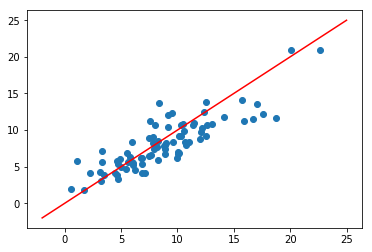

In [73]:
##### Linear ######
clf = LinearRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
r2_test = clf.score(X_test, y_test)
abs_test = abserr(y_pred, y_test)
print(r2_test, abs_test)
x0 = np.linspace(-2, 25, 100)
plt.plot(x0, x0, 'r')
plt.scatter(y_test, y_pred)

test_data['Linear'] = y_pred

In [74]:
######## SVR ######
clf = SVR()
######## Range ########
C_range = 2 ** np.arange(0, 14)
gamma_range = 2 ** np.linspace(0, -10, 11)
tuned_parameters = dict(C=C_range, gamma=gamma_range)
######## Param #########


clf = GridSearchCV(estimator=clf, param_grid=tuned_parameters, cv=cv, n_jobs=-1)
clf.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.5f, test_score: %0.5f" % (clf.best_params_, clf.best_score_, clf.score(X_test, y_test)))
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("r2: %0.4f, std: %0.03f for %r" % (mean, std, params))
print()

The best parameters are {'C': 16, 'gamma': 0.03125} with a score of 0.77118, test_score: 0.84321

{'C': 16, 'gamma': 0.03125}

Grid scores on development set:

r2: 0.0966, std: 0.105 for {'C': 1, 'gamma': 1.0}
r2: 0.1707, std: 0.112 for {'C': 1, 'gamma': 0.5}
r2: 0.2670, std: 0.112 for {'C': 1, 'gamma': 0.25}
r2: 0.3763, std: 0.108 for {'C': 1, 'gamma': 0.125}
r2: 0.4828, std: 0.090 for {'C': 1, 'gamma': 0.0625}
r2: 0.5659, std: 0.063 for {'C': 1, 'gamma': 0.03125}
r2: 0.6223, std: 0.049 for {'C': 1, 'gamma': 0.015625}
r2: 0.6433, std: 0.052 for {'C': 1, 'gamma': 0.0078125}
r2: 0.6350, std: 0.057 for {'C': 1, 'gamma': 0.00390625}
r2: 0.6024, std: 0.059 for {'C': 1, 'gamma': 0.001953125}
r2: 0.5234, std: 0.061 for {'C': 1, 'gamma': 0.0009765625}
r2: 0.1707, std: 0.115 for {'C': 2, 'gamma': 1.0}
r2: 0.2732, std: 0.121 for {'C': 2, 'gamma': 0.5}
r2: 0.3894, std: 0.119 for {'C': 2, 'gamma': 0.25}
r2: 0.5049, std: 0.112 for {'C': 2, 'gamma': 0.125}
r2: 0.6055, std: 0.089 for {'C': 2, 'gamma

0.843205235909 1.19429780672


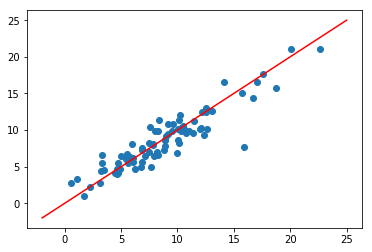

In [75]:
y_pred = clf.predict(X_test)
r2_test = clf.score(X_test, y_test)
abs_test = abserr(y_pred, y_test)
print(r2_test, abs_test)
x0 = np.linspace(-2, 25, 100)
plt.plot(x0, x0, 'r')
plt.scatter(y_test, y_pred)

test_data['SVR'] = y_pred

In [76]:
######## DTR ######
clf = DecisionTreeRegressor()
######## Range ########
max_depth = np.linspace(2, 21, 20, dtype=int)
min_samples_split = np.linspace(2, 31, 30, dtype=int)
tuned_parameters = dict(max_depth=max_depth, min_samples_split=min_samples_split)
######## Param #########


clf = GridSearchCV(estimator=clf, param_grid=tuned_parameters, cv=cv, n_jobs=-1)
clf.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.5f, test_score: %0.5f" % (clf.best_params_, clf.best_score_, clf.score(X_test, y_test)))
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("r2: %0.4f, std: %0.03f for %r" % (mean, std, params))
print()

The best parameters are {'max_depth': 12, 'min_samples_split': 20} with a score of 0.75947, test_score: 0.67352

{'max_depth': 12, 'min_samples_split': 20}

Grid scores on development set:

r2: 0.5239, std: 0.087 for {'max_depth': 2, 'min_samples_split': 2}
r2: 0.5239, std: 0.087 for {'max_depth': 2, 'min_samples_split': 3}
r2: 0.5239, std: 0.087 for {'max_depth': 2, 'min_samples_split': 4}
r2: 0.5239, std: 0.087 for {'max_depth': 2, 'min_samples_split': 5}
r2: 0.5239, std: 0.087 for {'max_depth': 2, 'min_samples_split': 6}
r2: 0.5239, std: 0.087 for {'max_depth': 2, 'min_samples_split': 7}
r2: 0.5239, std: 0.087 for {'max_depth': 2, 'min_samples_split': 8}
r2: 0.5239, std: 0.087 for {'max_depth': 2, 'min_samples_split': 9}
r2: 0.5239, std: 0.087 for {'max_depth': 2, 'min_samples_split': 10}
r2: 0.5239, std: 0.087 for {'max_depth': 2, 'min_samples_split': 11}
r2: 0.5239, std: 0.087 for {'max_depth': 2, 'min_samples_split': 12}
r2: 0.5239, std: 0.087 for {'max_depth': 2, 'min_samples_sp

0.673521328016 1.78045584484


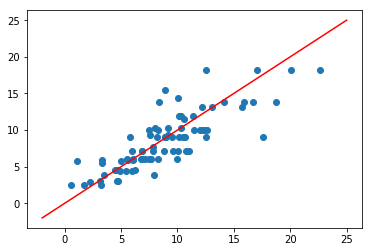

In [77]:
y_pred = clf.predict(X_test)
r2_test = clf.score(X_test, y_test)
abs_test = abserr(y_pred, y_test)
print(r2_test, abs_test)
x0 = np.linspace(-2, 25, 100)
plt.plot(x0, x0, 'r')
plt.scatter(y_test, y_pred)

test_data['DTR'] = y_pred

In [78]:
clf = GradientBoostingRegressor(random_state=38)

######## Range ########
n_range = np.linspace(10, 290, 15, dtype=int)
learn = np.linspace(0.01, 0.29, 15)
######## Param #########
tuned_parameters_1 = dict(learning_rate=learn, n_estimators=n_range)


clf = GridSearchCV(estimator=clf, param_grid=tuned_parameters_1, cv=cv, n_jobs=-1)
clf.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.5f, test_score: %0.5f" % (clf.best_params_, clf.best_score_, clf.score(X_test, y_test)))
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("r2: %0.4f, std: %0.03f for %r" % (mean, std, params))
print()

The best parameters are {'learning_rate': 0.12999999999999998, 'n_estimators': 90} with a score of 0.82719, test_score: 0.86269

{'learning_rate': 0.12999999999999998, 'n_estimators': 90}

Grid scores on development set:

r2: 0.0981, std: 0.021 for {'learning_rate': 0.01, 'n_estimators': 10}
r2: 0.2842, std: 0.035 for {'learning_rate': 0.01, 'n_estimators': 30}
r2: 0.4111, std: 0.039 for {'learning_rate': 0.01, 'n_estimators': 50}
r2: 0.5020, std: 0.040 for {'learning_rate': 0.01, 'n_estimators': 70}
r2: 0.5696, std: 0.041 for {'learning_rate': 0.01, 'n_estimators': 90}
r2: 0.6198, std: 0.039 for {'learning_rate': 0.01, 'n_estimators': 110}
r2: 0.6555, std: 0.038 for {'learning_rate': 0.01, 'n_estimators': 130}
r2: 0.6827, std: 0.038 for {'learning_rate': 0.01, 'n_estimators': 150}
r2: 0.7053, std: 0.038 for {'learning_rate': 0.01, 'n_estimators': 170}
r2: 0.7243, std: 0.037 for {'learning_rate': 0.01, 'n_estimators': 190}
r2: 0.7400, std: 0.035 for {'learning_rate': 0.01, 'n_estimator

In [79]:
clf = GradientBoostingRegressor(learning_rate=0.12, n_estimators=90,random_state=38)
######## Range ########
max_depth = np.linspace(2, 12, 11, dtype=int)
######## Param #########
tuned_parameters_2 = dict(max_depth=max_depth)


clf = GridSearchCV(estimator=clf, param_grid=tuned_parameters_2, cv=cv, n_jobs=-1)
clf.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.5f, test_score: %0.5f" % (clf.best_params_, clf.best_score_, clf.score(X_test, y_test)))
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("r2: %0.4f, std: %0.03f for %r" % (mean, std, params))
print()

The best parameters are {'max_depth': 4} with a score of 0.82693, test_score: 0.87623

{'max_depth': 4}

Grid scores on development set:

r2: 0.7995, std: 0.020 for {'max_depth': 2}
r2: 0.8238, std: 0.020 for {'max_depth': 3}
r2: 0.8269, std: 0.015 for {'max_depth': 4}
r2: 0.8121, std: 0.035 for {'max_depth': 5}
r2: 0.8129, std: 0.015 for {'max_depth': 6}
r2: 0.8016, std: 0.027 for {'max_depth': 7}
r2: 0.7892, std: 0.021 for {'max_depth': 8}
r2: 0.7794, std: 0.037 for {'max_depth': 9}
r2: 0.7740, std: 0.031 for {'max_depth': 10}
r2: 0.7756, std: 0.033 for {'max_depth': 11}
r2: 0.7636, std: 0.032 for {'max_depth': 12}



In [80]:
clf = GradientBoostingRegressor(learning_rate=0.12, n_estimators=90, max_depth=4, random_state=38)
######## Range ########
min_samples_split = np.linspace(2, 17, 16, dtype=int)
######## Param #########
tuned_parameters_3 = dict(min_samples_split=min_samples_split)


clf = GridSearchCV(estimator=clf, param_grid=tuned_parameters_3, cv=cv, n_jobs=-1)
clf.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.5f, test_score: %0.5f" % (clf.best_params_, clf.best_score_, clf.score(X_test, y_test)))
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("r2: %0.4f, std: %0.03f for %r" % (mean, std, params))
print()

The best parameters are {'min_samples_split': 6} with a score of 0.83127, test_score: 0.88486

{'min_samples_split': 6}

Grid scores on development set:

r2: 0.8269, std: 0.015 for {'min_samples_split': 2}
r2: 0.8289, std: 0.018 for {'min_samples_split': 3}
r2: 0.8306, std: 0.016 for {'min_samples_split': 4}
r2: 0.8253, std: 0.012 for {'min_samples_split': 5}
r2: 0.8313, std: 0.013 for {'min_samples_split': 6}
r2: 0.8283, std: 0.010 for {'min_samples_split': 7}
r2: 0.8297, std: 0.013 for {'min_samples_split': 8}
r2: 0.8251, std: 0.014 for {'min_samples_split': 9}
r2: 0.8215, std: 0.015 for {'min_samples_split': 10}
r2: 0.8271, std: 0.011 for {'min_samples_split': 11}
r2: 0.8277, std: 0.013 for {'min_samples_split': 12}
r2: 0.8261, std: 0.013 for {'min_samples_split': 13}
r2: 0.8293, std: 0.007 for {'min_samples_split': 14}
r2: 0.8279, std: 0.009 for {'min_samples_split': 15}
r2: 0.8244, std: 0.019 for {'min_samples_split': 16}
r2: 0.8278, std: 0.007 for {'min_samples_split': 17}



In [81]:
clf = GradientBoostingRegressor(learning_rate=0.12, n_estimators=90, max_depth=4, min_samples_split=6, random_state=38)
######## Range ########
subsample=np.linspace(0.1, 1.0, 10)
######## Param #########
tuned_parameters_4 = dict(subsample=subsample)


clf = GridSearchCV(estimator=clf, param_grid=tuned_parameters_4, cv=cv, n_jobs=-1)
clf.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.5f, test_score: %0.5f" % (clf.best_params_, clf.best_score_, clf.score(X_test, y_test)))
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("r2: %0.4f, std: %0.03f for %r" % (mean, std, params))
print()

The best parameters are {'subsample': 0.59999999999999998} with a score of 0.83334, test_score: 0.89950

{'subsample': 0.59999999999999998}

Grid scores on development set:

r2: 0.8055, std: 0.027 for {'subsample': 0.10000000000000001}
r2: 0.8094, std: 0.023 for {'subsample': 0.20000000000000001}
r2: 0.8220, std: 0.028 for {'subsample': 0.30000000000000004}
r2: 0.8304, std: 0.021 for {'subsample': 0.40000000000000002}
r2: 0.8248, std: 0.022 for {'subsample': 0.5}
r2: 0.8333, std: 0.018 for {'subsample': 0.59999999999999998}
r2: 0.8200, std: 0.018 for {'subsample': 0.70000000000000007}
r2: 0.8283, std: 0.014 for {'subsample': 0.80000000000000004}
r2: 0.8222, std: 0.012 for {'subsample': 0.90000000000000002}
r2: 0.8313, std: 0.013 for {'subsample': 1.0}



0.899501388327 1.03857036105


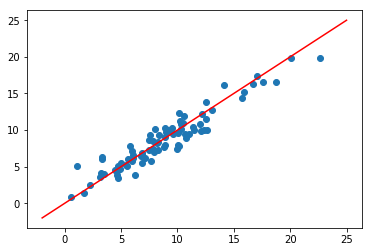

In [82]:
y_pred = clf.predict(X_test)
r2_test = clf.score(X_test, y_test)
abs_test = abserr(y_pred, y_test)
print(r2_test, abs_test)
x0 = np.linspace(-2, 25, 100)
plt.plot(x0, x0, 'r')
plt.scatter(y_test, y_pred)

test_data['GBDT'] = y_pred

In [86]:
test_data['Mesured'] = y_test
test_data.to_csv('Four.csv')

In [7]:
def test_model(clf, x=X_train, y=y_train, randn=38):               
    r2_val_score = cross_val_score(clf, x, y, cv=cv, n_jobs=-1)   
    scores=r2_val_score.mean()
    stds=r2_val_score.std()
    return np.array([scores, stds]) 

In [8]:
results = {}

clf = LinearRegression()  
results["Linear"]=test_model(clf)  

clf = SVR(C=12, gamma=0.03125)  
results["SVM RBF"]=test_model(clf) 

clf = DecisionTreeRegressor()  
results["RandomForest"]=test_model(clf) 

clf = GradientBoostingRegressor()
results["GradientBoosting"]=test_model(clf)

,R Square Score,Std
Linear,0.705726,0.044092
RandomForest,0.734430,0.042347
SVM RBF,0.769114,0.069974
GradientBoosting,0.819986,0.018650


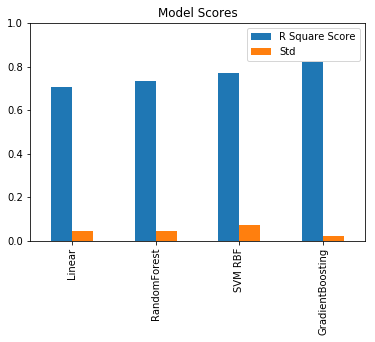

In [9]:
results1 = pd.DataFrame.from_dict(results,orient='index') 
results1.columns=['R Square Score', 'Std'] 
results1 = results1.sort_values(by='R Square Score')
#results1['Std'] = results1['Std'] * 10
results1.plot(kind="bar",title="Model Scores") 
axes = plt.gca()  
axes.set_ylim([0,1])
results1